### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [50]:
#rename passanger to passenger
df = data
df.rename(columns={"passanger":"passenger"}, inplace=True)

def dataset_review(data):
    print("\n--- Dataset Overview ---")
    print(data.info())
    print("\n--- Missing Values ---")
    print(data.isnull().sum()[data.isnull().sum() > 0])
    print("\n--- # of Duplicate Rows ---")
    print(data.duplicated().sum())
    print("\n--- List of Duplicate Rows ---")
    print(data[data.duplicated(keep='first')])
    print("\n--- Numeric Columns with NaN Values ---")
    print(data.select_dtypes(include=['number']).isnull().sum())

dataset_review(df)


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar       

2. Investigate the dataset for missing or problematic data.

In [51]:
#define a function to display problematic data and print missing, duplicate values, any invalid numbers (NaN)
def get_missing_cols(df):
    print("\n--- Values are missing for the following columns in the data set ---")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    
get_missing_cols(df)
print("\nAnalysis: \nClearly the Car column has the most missing data, which might not provide any valuable insights.")



--- Values are missing for the following columns in the data set ---
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

Assessment: Clearly the Car column has the most missing data, which might not provide any valuable insights.


3. Decide what to do about your missing data -- drop, replace, other...

In [75]:

#1. Drop Car Column
#Since the car column has no values for 99% of the rows, there is no measurable value in keeping it. 
#Dropping Car column
# Adding the if statement to avoid any errors on rerun of these statements
if ('car' in df):
    df = df.drop('car', axis=1)
    
print(df)

#2. There are null values in other columns. 
print(df.isnull().sum()[df.isnull().sum() > 0])

#Lets fill these values with meaningful values
#First find the distinct values in these columns
print("\n--- Unique Values in Each Column ---")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

#Results - Few columns with data that can do with some clean up
#Bar:['never' 'less1' '1~3' 'gt8' nan '4~8']
#CoffeeHouse:['never' 'less1' '4~8' '1~3' 'gt8' nan]
#CarryAway:[nan '4~8' '1~3' 'gt8' 'less1' 'never']
#RestaurantLessThan20:['4~8' '1~3' 'less1' 'gt8' nan 'never']
#Restaurant20To50:['1~3' 'less1' 'never' 'gt8' '4~8' nan]
#expiration: ['1d' '2h'] 
# --- can convert to the same unit of time, Ex: hrs
#age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
# --- Convert to all numeric, ex: 50plus-> 51 or more; below21 to 20 or less


#3. Replace NaNs and age
#Replace all NaNs with unknown
df = df.fillna('unknown')

df ["age"] = df["age"].apply(lambda x: random.randint(52, 100) if x == "50plus" else x)
df ["age"] = df["age"].apply(lambda x: random.randint(10, 20) if x == "below21" else x)
df["age"] = pd.to_numeric(df["age"])


           destination  passenger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender  age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female   21  Unmarried partner  ...   
1               Coffee House         2h  Female   21  Unmarried partner

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



Proportion of users accepting the coupon: 56.8 %


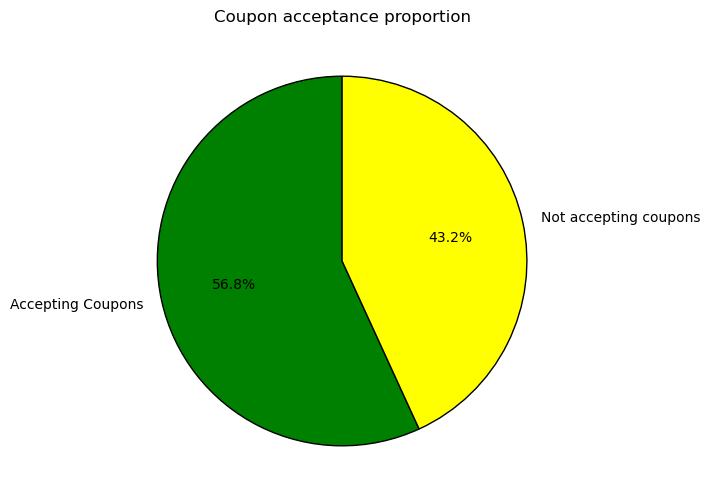

In [95]:
proportion_Y_1 = round(df["Y"].mean()*100, 1)
print(f"Proportion of users accepting the coupon: {proportion_Y_1} %")
# Pie chart visualization
plt.figure(figsize=(6, 6))
df["Y"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow'], labels=["Accepting Coupons", "Not accepting coupons"], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Coupon acceptance proportion")
plt.ylabel("")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

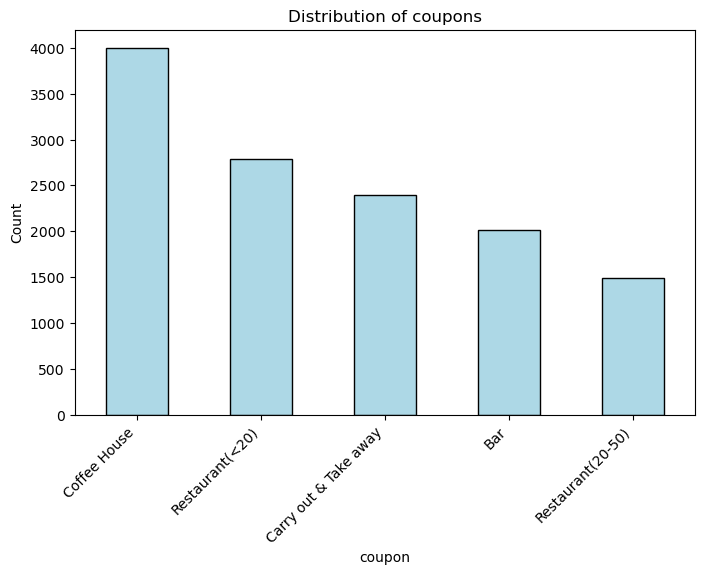

In [103]:
#Bar graph for coupon counts
plt.figure(figsize=(8, 5))
df["coupon"].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.ylabel("Count")
plt.title("Distribution of coupons")
plt.xticks(rotation=45, ha='right')
plt.show()

6. Use a histogram to visualize the temperature column.

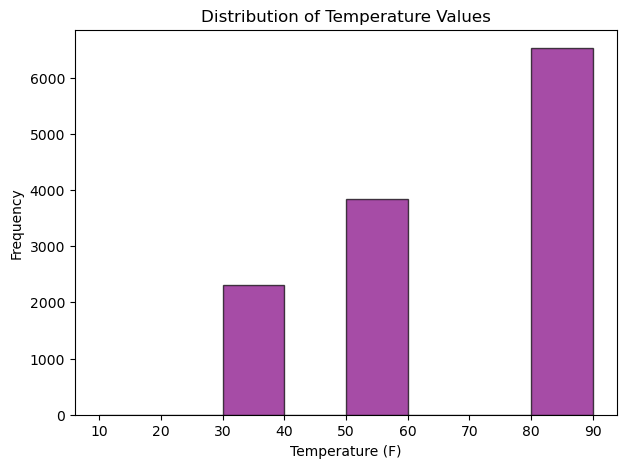

In [115]:
# Histogram for temperature
plt.figure(figsize=(7, 5))
plt.hist(df["temperature"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], color='purple', edgecolor='black', alpha=0.7)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Values")
plt.show()


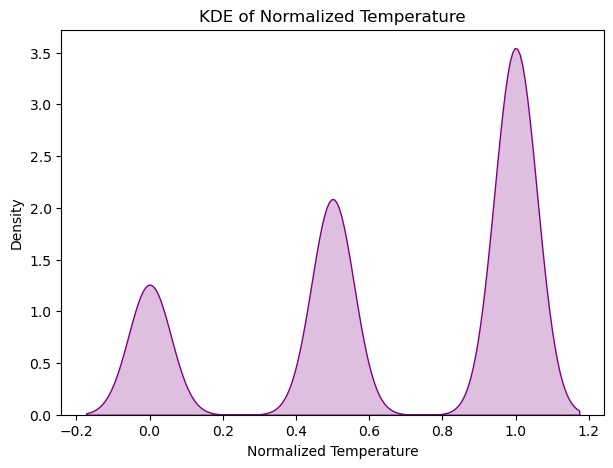

In [118]:
# Trying another type of visualisation since the bar plot above looks too basic. 
# Below is a KDE visualization of temparature. Gives the same insights as bar plot, but looks a bit smoother. 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Normalize Temperature
scaler = MinMaxScaler()
df["Temperature_Normalized"] = scaler.fit_transform(df[["temperature"]])

# KDE Plot
plt.figure(figsize=(7, 5))
sns.kdeplot(df["Temperature_Normalized"], fill=True, color="purple")
plt.xlabel("Normalized Temperature")
plt.ylabel("Density")
plt.title("KDE of Normalized Temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
bar_coupons_df = df.query('coupon == "Bar"')
bar_coupons_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Temperature_Normalized
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,0,0,1,0,1.0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,0,0,1,0,1,0.5
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,1,0,1,0,0.5
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,1.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1.0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,0.5
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,0.5
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,0.5


2. What proportion of bar coupons were accepted?


Proportion of users accepting the coupon: 41.0 %


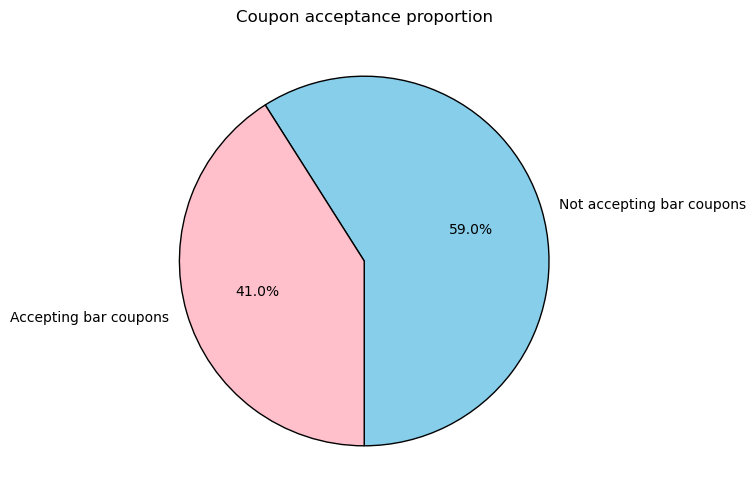

In [135]:
proportion_bar_Y_1 = round(bar_coupons_df["Y"].mean()*100, 1)
print(f"Proportion of users accepting the coupon: {proportion_bar_Y_1} %")
# Pie chart visualization
plt.figure(figsize=(6, 6))
bar_coupons_df["Y"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], labels=["Not accepting bar coupons", "Accepting bar coupons"], startangle=270, wedgeprops={'edgecolor': 'black'})
plt.title("Coupon acceptance proportion")
plt.ylabel("")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


People who accepted coupons and went to the bar:
1) less than 3 times = 510
2) more than 3 times = 153


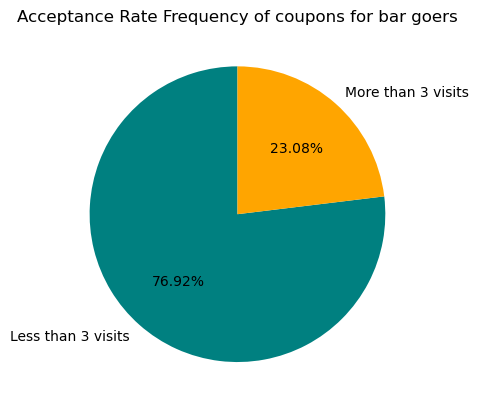

In [167]:
#Bar unique values: ['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']
# Compare acceptance rate based on bar visits

lt_3_bar_visits = bar_coupons_df[(bar_coupons_df['Y'] == 1) & (bar_coupons_df["Bar"].isin(["less1", "1~3"]))].shape[0]
mt_3_bar_visits = bar_coupons_df[(bar_coupons_df['Y'] == 1) & (bar_coupons_df["Bar"].isin(["4~8", "gt8"]))].shape[0]

print(f"People who accepted coupons and went to the bar:")
print(f"1) less than 3 times = {lt_3_bar_visits}")
print(f"2) more than 3 times = {mt_3_bar_visits}")

plt.pie([lt_3_bar_visits, mt_3_bar_visits], autopct='%1.2f%%',startangle=90, colors=['teal', 'orange'], labels=['Less than 3 visits','More than 3 visits'])
plt.title("Acceptance Rate Frequency of coupons for bar goers")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


253
36


Text(0.5, 1.0, 'Bar Coupon Acceptance Rate Frequency for bar goers')

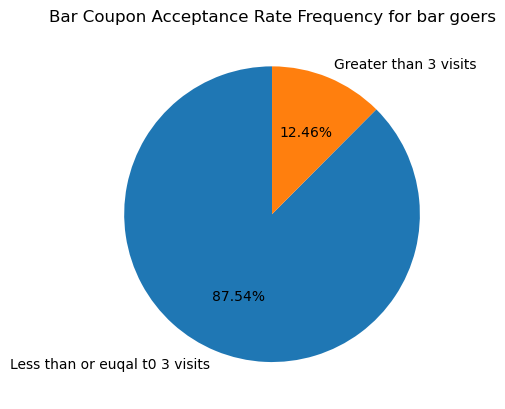

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  